----------------------
# Fundamentals of Data Analytics - Project 2020
### Eoin Lees - G00387888 - January 2021
--------------

# Instructions

In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict
wind turbine power output from wind speed values using the data set as a basis.
Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

---------------------------
# Introduction

---------------------------

The purpose of this project is to get a practical understanding of applying simple linear regression to a given data set. It must be understood, analyised and explained along the way. 

This notebook is broken down into a number of sections. They serve to guide you through the analysis. 

* Import data
* Initial analysis
* Clean up data
* Perform simple linearregression
* Explain methods used
* Calculate costs
* Perform complex regression
* Explain methods used
* Calculate cost
* Results
* Conclusions
* References

The methods applied could be applied to similar datasets. 

## Simple linear regression


**What is regression analysis?**
"Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables."[[1]](https://en.wikipedia.org/wiki/Regression_analysis)

"Linear regression is the most widely used statistical technique; it is a way to model a relationship between two sets of variables. The result is a linear regression equation that can be used to make predictions about data." [[2]](Linear regression is the most widely used statistical technique; it is a way to model a relationship between two sets of variables. The result is a linear regression equation that can be used to make predictions about data.)

## Complex regression

Regression can come in a number of different forms; linear, multiple linear and non linear. For linear relationships, as you increase the independent variable by one unit, the mean of the dependent variable always changes by a specific amount.[[3]](https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression) 
This is not always the case, especially in real world scenarios. Often there are curved relationships between the variables. In a curved relationship the effect of the independent variable is not a constant value. 

You can fit curves using linear regression. It is common to use polynominal terms in a linear model. Polynomial terms are independent variables that you raise to a power, such as squared or cubed terms.[[3]](https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression) 
By counting the number of bends in a line it is possible to quickly determine the correct terms to use. Take the number of bends in your curve and add one for the model order that you need.

Below are examples of polynomial curves:[[3]](https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression)

Linear | Quadratic | Cubic
:-: | :-: | :-:
 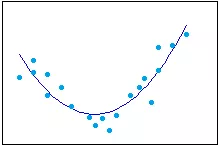 | 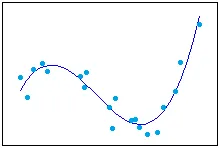 | 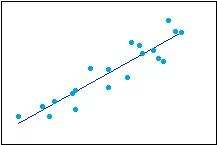 



## Dataset


This analysis is performed on a dataset that shows how much power is produced by a wind turbine depending on a specific wind speed. It is available for download from the github of user ianmcloughlin for the purpose of this exercise. [[4]](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv)

The dataset consists of two columns of values, `speed` and `power` with 500 entries in each. Each wind speed value corrosponds to the power produced value directly. 





## Import modules and plot styles
---------------------

In [24]:
#Import Modules
import pandas as pd
import matplotlib.style as style
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [25]:
# Check Stlyes available for plots and set style
style.available
style.use('fivethirtyeight')

## Import Data
------------------------

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


## Initial  analysis and plots
-----------------------

In [46]:
# Desribe Variables
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


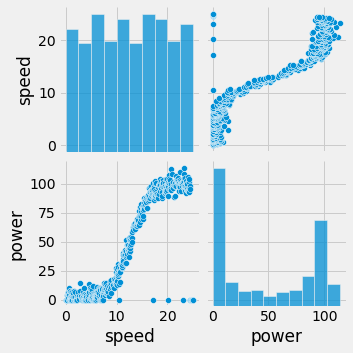

In [47]:
# Pairplot to get initial view of data.
sns.pairplot(df)

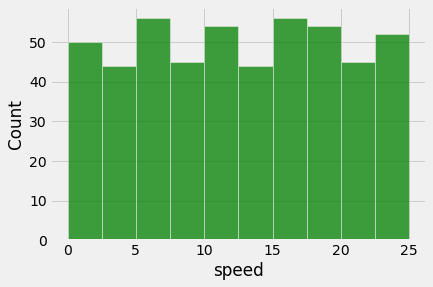

In [48]:
# Speed plotted againt count
sns.histplot(data=df, x="speed", color='g')
plt.show()

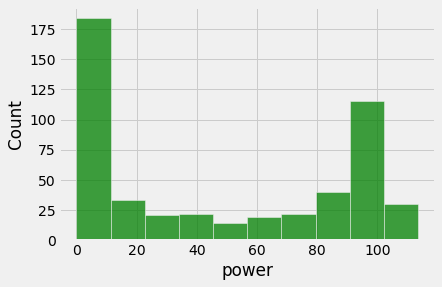

In [49]:
# Power plotted againt count
sns.histplot(data=df, x="power", color='g')
plt.show()

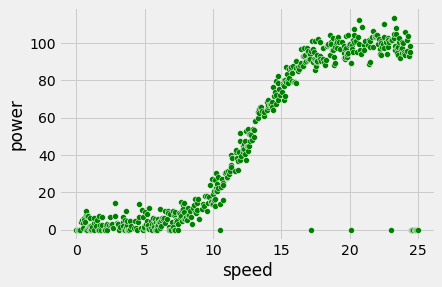

In [50]:
# Seaborn scatterplot of wind speed vs power

sns.scatterplot(data=df, x="speed", y="power", color='g')
plt.show()

#### Describe

Running the `df.describe()`[[5]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function gives a summary of all the data in the dataframe.

It gives us the limits of the data along with the mean values and standard deviations. These values can be usefull in simulating data. This function also gives us a good understanding of teh data in the function. 

#### Pairplot

Running `sns.pairplot()`[[6]](https://seaborn.pydata.org/generated/seaborn.pairplot.html) on a dataset is a good starting off point in understanding the relationship of variables. It provides us with all the the various plots we need to decide what to look at next. 

#### Speed plot

The speed plot was created using `sns.histplot()`[[7]](https://seaborn.pydata.org/generated/seaborn.histplot.html) and shows us that the speed roughly uniformly distributued. [[8]](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

#### Power plot

The power plot again was created using `sns.histplot()`.[[7]](https://seaborn.pydata.org/generated/seaborn.histplot.html)

It reveals some interesting information. Over 175 of the points  out of 500 are plotted are in the 0-10 power bracket suggesting that there is a threshold speed that must be reached in order for any power to be generated. 

#### Speed vs Power

The speed vs Power plot was created using `sns.scatterplot()`.[[9]](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) It shows the relationship between the two variables. 

This relationsship is not linear. It has two distinct curves. 

There are also a number of 0 power points at wind speeds above 10. This is not consistent with the rest of the data. 


## Clean the data set
-------------------------------

In [51]:
# outlier datapoints
df_out = df[(df["speed"]>10) & (df["power"]==0)]

print(df_out)
df_out.count()

      speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


speed    14
power    14
dtype: int64

In [52]:
# remove the outliers
dfClean = dfpowprod.drop(df_out.index, axis=0)

# Output as csv 
dfClean.to_csv("powerproduction.csv", index=False, encoding='utf8')

In [53]:
# Describe new data
dfClean.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000


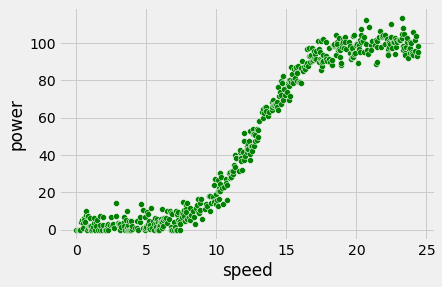

In [37]:
# New data Seaborn scatterplot of wind speed vs power

sns.scatterplot(data=dfClean, x="speed", y="power", color='g')
plt.show()

#### Identify outliers

The data that was identified as an outlier was any point that had a power value of 0 and a speed value greater than 10.

The outliers were identified using `df_out = df[(df["speed"]>10) & (df["power"]==0)]`.  The summary showed 14 datapoints that met this criteria. 

#### Removing outliers and saving 

The outliers were removed using `df.drop()`.[[10]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

A new dataset was created and saved to csv.

#### Review new data

After removing the outliers the average speed & max speed of the dataset have been reduced. 

Plotting Speed vs. Power again we can verify that the data is now more usable. 

--------------------------
# Linear Regression
-------------------------

## Edit this: Method? Intro to equation

what am I doing. Where is it from

Whats a regplot? regression? 

---------------------------
# References
------------------------

[1] Regression analysis; Wikipedia; https://en.wikipedia.org/wiki/Regression_analysis

[2] Linear Regression: Simple Steps, Video. Find Equation, Coefficient, Slope; Statistics How To;  https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/

[3] Curve Fitting using Linear and Nonlinear Regression; Jim Frost; Statistics by jim; https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression.

[4] ianmcloughlin; github.com; https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv

[5] pandas.DataFrame.describe; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

[6] seaborn.pairplot; seaborn; Michael Waskom; https://seaborn.pydata.org/generated/seaborn.pairplot.htmlPairplot

[7] seaborn.histplot; seaborn; Michael Waskom; https://seaborn.pydata.org/generated/seaborn.histplot.html

[8] Continuous uniform distribution; Wikipedia;  https://en.wikipedia.org/wiki/Continuous_uniform_distribution

[9] seaborn.scatterplot; seaborn; Michael Waskom; https://seaborn.pydata.org/generated/seaborn.scatterplot.html

[10] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html


https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

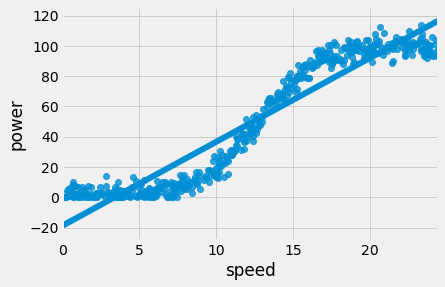

In [12]:
sns.regplot(x="speed", y="power", data=dfpowprod);

 ## https://seaborn.pydata.org/tutorial/regression.html
 
 Refer to this for correct plots
 
 research complex linear regression - curved lines
 
 https://seaborn.pydata.org/generated/seaborn.regplot.html
 
 --------------

# Linear Regression

--------------------------

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

linear regression model? 

## Edit this: Method? Intro to equation

what am I doing. Where is it from

In [13]:
# Perform linear regression
lr = LinearRegression()

# convert data into numpy array
X = dfpowprod.speed.values.reshape(-1, 1)
Y = dfpowprod.power.values.reshape(-1, 1)


lr.fit(X, Y)

# Y predictions off of X values
Y_pred = lr.predict(X)


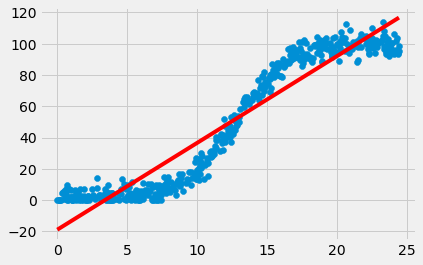

In [14]:
# Visualise the results

# create scatterplot from dataset
plt.scatter(X,Y)

# create regression line
plt.plot(X, Y_pred, color='red')

# show plot
plt.show()

 linik to plot above [[1]](https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d)
 
 ## Issues with this method

------------------
# Complex Linear regression
----------------


### Theory

Add equation + explain

Info for creating curve fit lines here: 

https://machinelearningmastery.com/curve-fitting-with-python/

read + get best fit. 

Justify best fit

y = 4.52411 * x + 0.04193 * x^2 + -14.68261


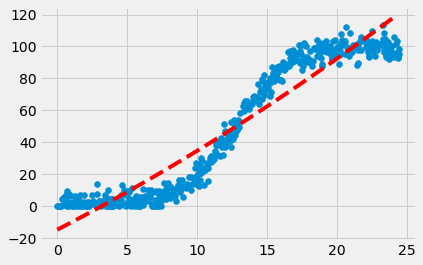

In [15]:
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c
 
# load the dataset
data = dfpowprod.values
# choose the input and output variables
x, y = data[:, 0], data[:, 1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

### Explination

description of curve

Why it doesnt fit


## Edit this: Method? Intro to equation

A polynomial regression line has an equation of the form, 

$$ a_{n}x^{n}+a_{n-1}x^{n-1}+\dotsb +a_{2}x^{2}+a_{1}x+a_{0} \hspace{1cm} (5) $$

NumPy's polyfit function can be used to developed a polynomial model using the method of least squares.

The NumPy polyfit function solves for the 'best fit' coefficients of the polynomial regression model for the inputted data, i.e $ a_{0}, a_{1}....a_{n} $. 

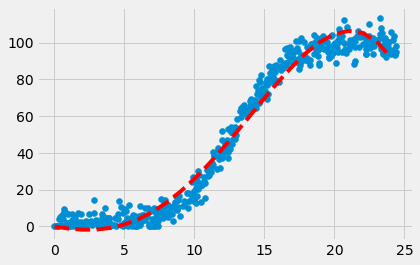

In [22]:
# fit a fifth degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c, d):#, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4)# + (e * x**5) + f
 
# load the dataset
data = dfpowprod.values

# choose the input and output variables
x, y = data[:, 0], data[:, 1]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c, d = popt #, e, f 

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c, d) #, e, f

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

### Explination

description of curve

Why it fits



In [17]:
# possible other version? 

## Calculate costs

In [18]:
# Cost of curve 1

In [19]:
# Cost of curve 2

-------------------------
# Results
-------------------------

Here is where the best version of linear regression will be presented

Compare all costs in table:

|   plot     | cost           | 
| :-------------: |:-------------:| 
| col 3 is      | right-aligned | 
| col 2 is      | centered      |   
| zebra stripes | are neat      |  


In [20]:
# Plot here

### Reasons this plot was chosen

* Reason
* Reason
* Reason
* Reason
* Reason
* Reason
* Reason



-------------------------
# Analysis
-------------------------

Analysis of methods

## Simple regression

* Method 1 - reg plot

* Method 1 - other

## complex regression

* Method 1 - one turn?

* Method 1 -  others


-----------------------------------
# Conclusions
-----------------------------------

Benefits of simple linear regression

understand your data

research reasons for non linear relationship

   * material issues
   * manufacturers
   * physics

